# Exercise on Linear Regression

This notebook will show you how to apply a linear regression to a time series of monthly averaged CO2 air concentration measured in Mauna Loa (data extracted from here: https://www.esrl.noaa.gov/gmd/ccgg/trends/mlo.html)

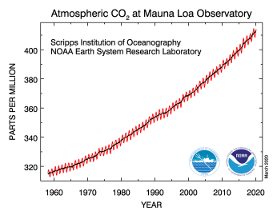

The linear regression will allow us to calculate the rate of increase of CO2 in the atmosphere, and how this trend has changed over the last decades.

In [ ]:
using PyPlot
using DelimitedFiles
using Statistics

In [ ]:
#This cell contains the script that calculates the linear regression.
#As you can see it follows the equations seen in the slides in class
#You need also to execute this cell (Shift + Enter as always)
#Once you execute it you can call it later on in your code

"""
    a,b,r2,sigma_a,sigma_b,sigma_e = mylinreg(x,y)

Linear regression

y ≈ a + b *  x

"""
function mylinreg(x,y)

    # remove NaNs
    ind = .!isnan.(x) .& .!isnan.(y);
    x = x[ind]
    y = y[ind]

    xm = mean(x); xa = x[:] .- xm;
    ym = mean(y); ya = y[:] .- ym;

    ssxy = xa'*ya;
    ssxx = xa'*xa;
    ssyy = ya'*ya;

    b = ssxy/ssxx;
    a = ym-b*xm;
    r2 = ssxy^2/(ssxx*ssyy);

    n = length(x);

    sigma_e = sqrt((ssyy - b^2 * ssxx)/(n-2))
    sigma_a = sigma_e * sqrt( sum(x.^2)/( n* ssxx ))
    sigma_b =  sigma_e / sqrt(ssxx);


    return a,b,r2,sigma_a,sigma_b,sigma_e
end


In [ ]:
#We download the data if they're not already in your disk 
#(if it's already in your disk a message will appear over a red background)

filename = "co2_mm_mlo.txt";
if !isfile(filename)
    @info("downloading $filename")
    cp(download("https://dox.uliege.be/index.php/s/lDbmzx8SQae6sdt/download"),filename)
else
    @info("$filename is already downloaded, nothing to be done")
end

In [ ]:
data = readdlm("co2_mm_mlo.txt", comments=true);
@show size(data)

#If you look at the text file (with a text editor), you will see it has a long header and then the data organised in 7 columns:
#{Year} {Month} {Decimal Year} {Average CO2} {Interpolated CO2} {Trend (seasonal correlation removed)} {#days for daily average}


In [ ]:
#We will creat two time series: one with the decimal year and another with the interpolated monthly CO2 averages:
time = data[:,3];
co2 = data[:,5];


In [ ]:
#We visualise the data with a simple plot, which gives the already famous curve
plot(time,co2);
ylabel("[CO2] (ppm)");
xlabel("time (years)");

In [ ]:
#Now, we simply call the regression function we wrote above (mylinreg).
#You provide variable x (time) and then the independent variable y (CO2)

a,b,r2,sigma_a,sigma_b,sigma_e = mylinreg(time,co2);

In [ ]:
#Parameter a gives us the y-axis zero crossing
#i.e. the time in which, if the trend would be constant in time, the line would cross 0 ppm of CO2
a

In [ ]:
#with our 2 regression parameters we can then vuild the regression line with equation y' =  a + bx
yp= a .+ b*time;

In [ ]:
#We re-do the plot above, adding a new line in red with the regression
plot(time,co2,label ="CO2")
plot(time,yp,"r",label = "Linear fit");
ylabel("[CO2] (ppm)");
xlabel("time (years)");
legend();

### Your interpretation of the results


$\rightarrow$ What is the trend provided by the regression? (in ppm per day) 

$\rightarrow$ What do you think of the regression? Is it good/bad? 

$\rightarrow$ What would you do differently?

----------------------------------------------------------------------------------------------------------------

Before proceeding with the exercise, let's comment on something:
When doing a linear regression with data that has a seasonal variability in it, as the CO2 concentration in Mauna Loa, the choice of teh initial and final points will have an effect on the trend.

Let's do a kind of an extreme example. If we had only a (very) limited amount of CO2 data and wanted to know if 
there is a trend of increasing concentration:

In [ ]:
plot(co2[708:715,1]);
ylabel("[CO2] (ppm)");
xlabel("time (years)");

In [ ]:
#Applying the regression over such short series:

aS,bS,r2S,sigma_aS,sigma_bS,sigma_eS = mylinreg(time[708:715],co2[708:715]);

In [ ]:
#We plot our reduced times series and the regression line

plot(co2[708:715,1],label="CO2");
plot(aS .+ bS * time[708:715],"r",label="Linear fit");
ylabel("[CO2] (ppm)");
xlabel("time (years)");
legend();

As you can see in the above plot, the trend of CO2 concentration over this short period is decreasing with time!!
Just an example of how you need to be careful on how you handle your data

Now let's return to the full time series. We saw that the linear fit might not be perfect for the data we have.
An alternative answer would be to apply another type of fit, like exponential fit.
But let's keep it simple :) 

### Exercise: 
Apply the linear regression separately to different periods of time (early period, mid-period late period) and 
look at how the trend has changed with time.

$\rightarrow$ What is the CO2 increasing trend in the 1960s?

$\rightarrow$ What is the CO2 increasing trend in the 1990s?

$\rightarrow$ What is the CO2 increasing trend in the 2010s?

Calculate your regression and make a plot including all three lines. You can use different colour for each period.


In [ ]:
#You can use these cells for your calculations
#If you want additional cells, you can do so in the "Insert" menu above



In [ ]:
#When you have the regressions, add them to this plot, remember to give a label to each line
#add also the trend ([CO2/day] for each period to the figure legend)
#you can save the figure by changing YOURNAME by... your name :) in the command below
#We'll visualise them all in a slack channel I've set up: https://join.slack.com/t/ocot/shared_invite/zt-cxh2uirp-dfQe6HTezFA42xuJ~lnBQg

#You'll need to log-in/create an account to use that. When you have your figure, upload it there.


plot(time,co2,label="CO2");
ylabel("[CO2] (ppm)");
xlabel("time (years)");
legend();
savefig("regression_YOURNAME.png")